<a href="https://colab.research.google.com/github/bhavrish/CVD-Classifer/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [2]:
df = pd.read_csv('../Data/cardio_train.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df_feat = df.iloc[:,1:-1] # everything but last column
df_feat.head() # age is in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [4]:
aics = []
bics = []

print("AIC\t\t\tBIC")
for k in range(2, 20):
    model = GaussianMixture(n_components= k, init_params= "kmeans" )
    labels = model.fit_predict(df_feat)
    
    akaike_info = model.aic(df_feat)
    aics.append(akaike_info)
    
    bayesian_info = model.bic(df_feat)
    bics.append(bayesian_info)
    
    print(str(akaike_info) + '\t' + str(bayesian_info))
    

AIC			BIC
3847836.9295283114	3849256.1483590715
2430430.3216506913	2432563.7280220916
2297973.426027185	2300821.0199392256
2274140.2721587885	2277702.05361147
2191537.043165819	2195813.0121591403
1691798.2972756599	1696788.453809622
1134204.7766223578	1139909.1206969605
1119144.1640955647	1125562.6957108078
1269363.0485153182	1276495.7676712018
1524116.9402724826	1531963.8469690066
925303.8947763303	933864.9890134948
976136.1362629533	985411.4180407582
1014507.7367335478	1024497.2060519931
560745.2888570623	571448.9457161481
766247.2589894824	777665.1033892087
2439752.649950169	2451884.6818905356
1530404.3226945037	1543250.542175511
1403774.6455876175	1417335.052609265


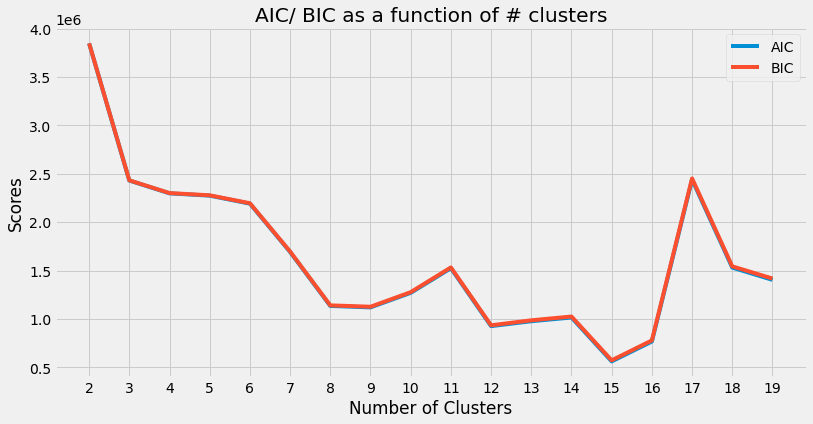

In [11]:
# plot results (N vs silhoutte scores)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), aics)
plt.plot(range(2, 20), bics)
plt.xticks(range(2, 20))
plt.title("AIC/ BIC as a function of # clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Scores")
plt.legend(['AIC', 'BIC'])
plt.show()


In [ ]:
# Ideal num of clusters is 15, 12, 14, 9, or 8 (in decreasing order) to minimize AIC/ BIC.